#Heart Disease Prediction


Initialization

In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# read UCI repository heart disease data set 
raw_df =  pd.read_csv('drive/MyDrive/processed.cleveland.data')
# raw_df =  pd.read_csv('heart-disease.names')
raw_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
X_names = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Y_names = ['yes','no']

# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Preprocessing

In [49]:
# Set target value to 0 or 1 -> 0 = no / 1, 2, 3, 4 = yes
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Check column types and correct wrong data types
df.info()
df['ca'] = pd.to_numeric(df.ca, errors='coerce')
df['thal'] = pd.to_numeric(df.thal, errors='coerce')

# Check missing values in the data set and corrected them
df.isnull().sum()
df.isna().sum()

df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


Data splitting

In [50]:
from sklearn.model_selection import train_test_split
# prepare NumPy ndarrays X and Y
X = np.array(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
Y = np.array(df[['target']])

# Split the data for training, testing and validating 
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,Y, test_size=0.20, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, shuffle=True, random_state=0)


Standardization

In [51]:
from sklearn.preprocessing import StandardScaler
# Standardization X_train, X_valid and X_test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_stded = scaler.transform(X_train)
X_test_stded = scaler.transform(X_test)
X_valid_stded = scaler.transform(X_valid)

-----------------------------------------------------------------------------------------------kernel SVM Classification---------------------------------------------------------------------------------------------

In [52]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
reg_weights = 10.0 ** np.arange(-10, 10)

# Define arrays to store the results
acc_train = np.ones_like(reg_weights) * np.inf
acc_valid = np.ones_like(reg_weights) * np.inf


for i, reg_weight in enumerate(reg_weights):
  svc = SVC(C=reg_weight, kernel='rbf')
  svc.fit(X_train_stded, y_train.reshape(y_train.size,))
  y_pred_train = svc.predict(X_train_stded)
  y_pred_valid = svc.predict(X_valid_stded)

  acc_train[i] = accuracy_score(y_train, y_pred_train)
  acc_valid[i] = accuracy_score(y_valid, y_pred_valid)

# Get the best weight over maximum accuracy score
best_weight = reg_weights[np.argmax(acc_valid)]

# Create linear svm object
svc = SVC(C=best_weight, kernel='rbf')
# Train the model 
svc.fit(X_train_stded, y_train.reshape(y_train.size,))
# Prediction
y_pred = svc.predict(X_test_stded)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)


Accuracy: 0.868852
Precision: 0.888889
Recall: 0.827586
F1 score: 0.857143


-----------------------------------------------------------------------------------Support Vector Machine Classification-------------------------------------------------------------------------------------

In [53]:
from sklearn.svm import LinearSVC

reg_weights = 10.0 ** np.arange(-10, 10)

# Define arrays to store the results
acc_train = np.ones_like(reg_weights) * np.inf
acc_valid = np.ones_like(reg_weights) * np.inf

for i, reg_weight in enumerate(reg_weights):
  lsvc = LinearSVC(C=reg_weight,dual=False)
  lsvc.fit(X_train_stded, y_train.reshape(y_train.size,))
  y_pred_train = lsvc.predict(X_train_stded)
  y_pred_valid = lsvc.predict(X_valid_stded)
  acc_train[i] = accuracy_score(y_train, y_pred_train)
  acc_valid[i] = accuracy_score(y_valid, y_pred_valid)

# Get the best weight over maximum accuracy score 
best_weight = reg_weights[np.argmax(acc_valid)]


# Create linear svm object
lsvc = LinearSVC(C=best_weight,dual=False)
# Train the model 
lsvc.fit(X_train_stded, y_train.reshape(y_train.size,))
# Prediction
y_pred = lsvc.predict(X_test_stded)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.901639
Precision: 0.896552
Recall: 0.896552
F1 score: 0.896552


-----------------------------------------------------------------------------------------------Logistic Regression---------------------------------------------------------------------------------------------

In [54]:
import sklearn.linear_model


reg_weights = 10.0 ** np.arange(-10, 10)

# Define arrays to store the results
acc_train = np.ones_like(reg_weights) * np.inf
acc_valid = np.ones_like(reg_weights) * np.inf

for i, reg_weight in enumerate(reg_weights):
  logReg = sklearn.linear_model.LogisticRegression(C=reg_weight,dual=False)
  logReg.fit(X_train_stded, y_train.reshape(y_train.size,))
  y_pred_train = logReg.predict(X_train_stded)
  y_pred_valid = logReg.predict(X_valid_stded)
  acc_train[i] = accuracy_score(y_train, y_pred_train)
  acc_valid[i] = accuracy_score(y_valid, y_pred_valid)

# Get the best weight over maximum accuracy score 
best_weight = reg_weights[np.argmax(acc_valid)]

# Create linear regression object
logReg = sklearn.linear_model.LogisticRegression(C = best_weight)

# Train the model 
logReg.fit(X_train_stded, y_train.reshape(y_train.size,))

# Make predictions 
y_pred = logReg.predict(X_test_stded)

# The parameters
theta = logReg.coef_

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)


Accuracy: 0.901639
Precision: 0.925926
Recall: 0.862069
F1 score: 0.892857


----------------------------------------------------------------------------------------------------Naïve Bayes--------------------------------------------------------------------------------------------------

In [55]:
from sklearn.naive_bayes import GaussianNB

# Create GaussianNB object
gaussNB = GaussianNB()

# Train the model 
gaussNB.fit(X_train_stded, y_train.reshape(y_train.size,))

# Predicting the Test set results
y_pred = gaussNB.predict(X_test_stded)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.868852
Precision: 0.888889
Recall: 0.827586
F1 score: 0.857143


--------------------------------------------------------------------------------------------Stochastic Gradient Descent-------------------------------------------------------------------------------------------

In [56]:
from sklearn.linear_model import SGDClassifier

# Create SGD object
sgd = SGDClassifier(loss = 'hinge', random_state = 101)

# Train the model 
sgd.fit(X_train_stded, y_train.reshape(y_train.size,))

# Predicting the Test set results
y_pred = sgd.predict(X_test_stded)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.885246
Precision: 0.866667
Recall: 0.896552
F1 score: 0.881356


--------------------------------------------------------------------------------------------K-Nearest Neighbours-------------------------------------------------------------------------------------------

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN object
knn = KNeighborsClassifier(n_neighbors = 4)

# Train the model 
knn.fit(X_train_stded, y_train.reshape(y_train.size,))

# Predicting the Test set results
y_pred = knn.predict(X_test_stded)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)


Accuracy: 0.901639
Precision: 0.925926
Recall: 0.862069
F1 score: 0.892857


--------------------------------------------------------------------------------------------Decision Tree-------------------------------------------------------------------------------------------

Accuracy: 0.836066
Precision: 0.787879
Recall: 0.896552
F1 score: 0.838710


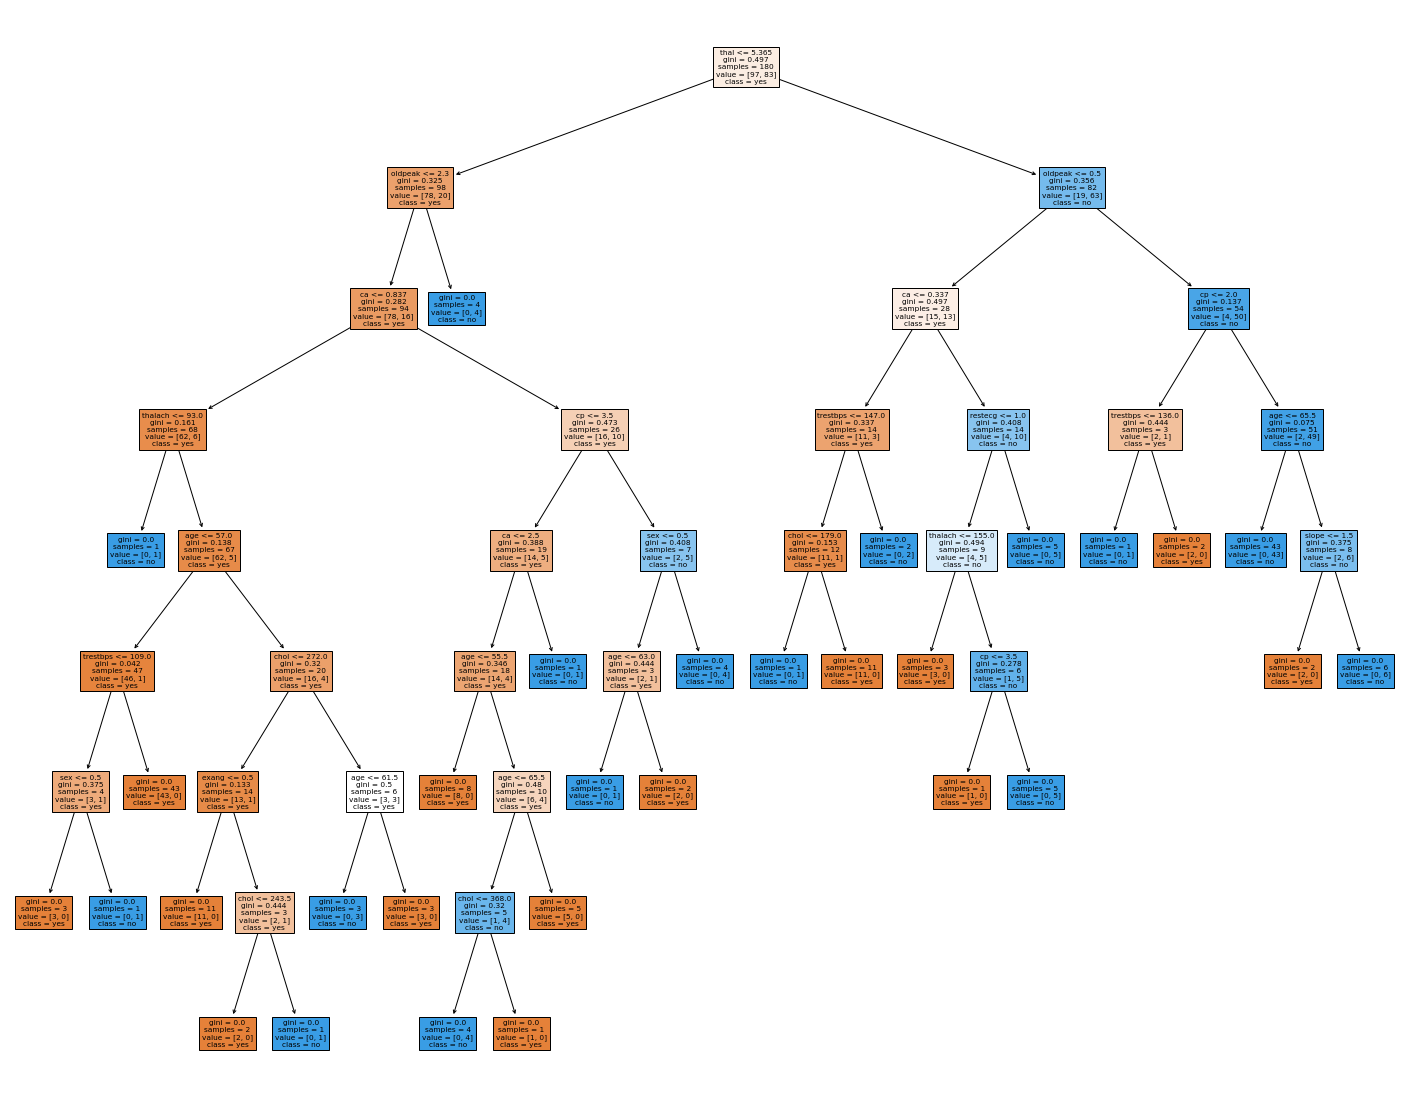

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Create Dicision Tree object
decisionTree = DecisionTreeClassifier()

# Train the model 
decisionTree.fit(X_train, y_train.reshape(y_train.size,))

# Predicting the Test set results
y_pred = decisionTree.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

fig = plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(decisionTree, feature_names=X_names, class_names=Y_names,filled=True)
fig.savefig("decistion_tree.png")

--------------------------------------------------------------------------------------------Random Forest-------------------------------------------------------------------------------------------

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
RandomForest = RandomForestClassifier(n_estimators = 10)

# Train the model 
RandomForest.fit(X_train, y_train.reshape(y_train.size,))

# Predicting the Test set results
y_pred = RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.868852
Precision: 0.888889
Recall: 0.827586
F1 score: 0.857143
